In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Galton's Hegitht Data - 아버지와 아들의 키 분석

In [3]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [4]:
df = df[df['Gender'] == 'M']                # 아들 데이터만 선별
df = df[['Father', 'Height']]               # 아버지, 아들 데이터 발췌
df.columns = ['Father', 'Son']              # 컬럼명 변경
df = df * 2.54                              # 단위 변경(inch -> cm)
df.reset_index(drop=True, inplace=True)     # index 리셋
df.head()

,Father,Son
0,199.39,185.928
1,191.77,186.690
2,191.77,184.150
3,190.50,180.340
4,190.50,179.070


- 산점도 그리기

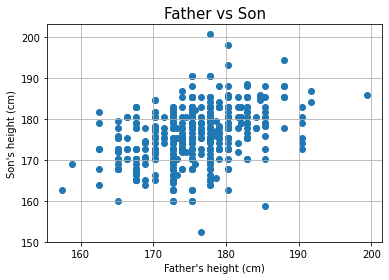

In [5]:
plt.scatter(df.Father, df.Son)
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title("Father vs Son", fontsize=15)
plt.show()

- 회귀선 구하고 그리기
    - np.polyfit(): 계수, 절편 찾기
    - np.linalg.lstsq()

In [6]:
weight, bias = np.polyfit(df.Father, df.Son, 1)     # X, Y, 차수
weight, bias

(0.447747917603028, 97.17763700739309)

In [7]:
# 회귀식을 2차식으로
np.polyfit(df.Father, df.Son, 2)

array([6.10561389e-04, 2.32817725e-01, 1.16071746e+02])

In [8]:
xs = np.array([156, 201])
ys = weight * xs + bias
ys

array([167.02631215, 187.17496845])

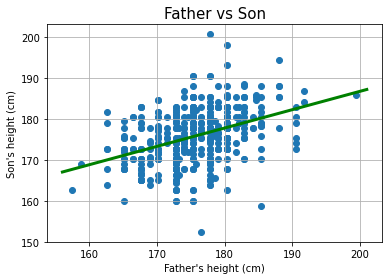

In [9]:
plt.scatter(df.Father, df.Son)
plt.plot(xs, ys, 'g-', lw=3)
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title("Father vs Son", fontsize=15)
plt.show()

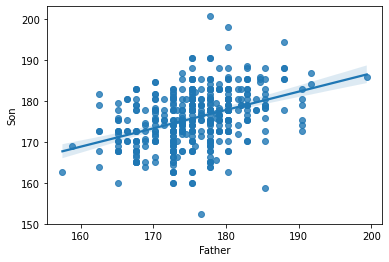

In [43]:
import seaborn as sns
sns.regplot(x='Father', y='Son', data=df);

- Scikit-learn으로 회귀식 구하기

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [14]:
# 차원 확인
df.Father.shape, df.Son.shape

((465,), (465,))

In [15]:
# X_train 데이터 2차원으로 변환 후 학습
lr.fit(df[['Father']], df.Son), lr.fit(df.Father.values.reshape(-1, 1), df.Son.values)

(LinearRegression(), LinearRegression())

In [48]:
# coefficient(계수) = weight
lr.coef_

array([0.44774792])

In [49]:
# intercept(절편) = bias
lr.intercept_

97.17763700739341

In [50]:
# 잔차 제곱의 합(RSS: Residual Sum of Square)
lr._residues

17556.59951549399

In [51]:
# 평가 - R squared(0 ~ 1 사이의 값으로 1에 가까울수록 설명력이 높음)
lr.score(df.Father.values.reshape(-1, 1), df.Son.values)

0.15312927478307048

In [54]:
from sklearn.metrics import r2_score
pred = lr.predict(df.Father.values.reshape(-1, 1))
r2_score(df.Son.values, pred)

0.15312927478307048